# BANK  LOAN DEFAULTERS Exploratory Data Analysis

## Aim:-

To give an idea of applying EDA in a real business scenario. In this case study, 
we will develop a basic understanding of business analytics in banking and financial services
and understand how data is used to minimise the risk of losing money while lending to customers.

### Business Problem:- 

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter.
Our objective is to provide a complete analysis of the behaviour of the customers and understand who or which category/background people having what attributes has more defaulters.


In [1]:
#importing the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df= pd.read_csv('Loan_defaulter_data.csv')

In [3]:
# Checking the structure of dataframe
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172,0.9782,0.7125,0.0172,0.0806,0.0345,0.4583,0.0417,0.0094,0.0882,0.0853,0.0,0.0125,0.2040,0.0887,0.9876,0.8323,0.0203,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0252,0.0451,0.9727,0.6406,0.0022,0.0000,0.1034,0.0833,0.1250,0.0592,0.0220,0.0267,0.0,0.0000,0.0250,0.0435,0.9727,0.6310,0.0022,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0000,0.0000,0.1050,0.0894,0.9816,0.7583,0.0124,0.0000,0.2069,0.1667,0.2

In [5]:
# Check number of rows and columns in df
print("Dataframe has {} rows and {} columns".format(df.shape[0],df.shape[1]))

Dataframe has 307511 rows and 122 columns


In [6]:
df.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [7]:
# Find the percentage of missing values per each column
(df.isnull().sum() / len(df)*100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [8]:
# removing columns with more than 50% null values
df = df.loc[: , (df.isnull().sum() / len(df) * 100) < 40]

In [9]:
# Check the new shape of our dataframe
df.shape

(307511, 73)

In [10]:
# Look at the new percent of missing values
round(df.isnull().sum() / len(df)*100, 2).sort_values(ascending=False)

OCCUPATION_TYPE                31.35
EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
NAME_TYPE_SUITE                 0.42
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
FLAG_DOCUMENT_7                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_11                0.00
FLAG_DOCUMENT_8                 0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
LIVE_CITY_NOT_WORK_CITY         0.00
F

In [11]:
# Get the name of the columumns with greater than 0% missing values and less than or equal to 40% missing values
cols = df.columns[((df.isnull().sum() / len(df) * 100) <= 40) & ((df.isnull().sum() / len(df) * 100) > 0)]
print(cols)
print(len(cols))

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')
18


In [12]:
df[df['AMT_ANNUITY'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Unaccompanied,Commercial associate,Incomplete higher,Single / not married,House / apartment,0.026392,-10668,-2523,-4946.0,-3238,1,1,1,1,1,0,High skill tech staff,1.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.626896,0.372334,1.0,0.0,1.0,0.0,-2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Unaccompanied,Working,Lower secondary,Civil marriage,House / apartment,0.035792,-9027,-1270,-3640.0,-741,1,1,1,1,0,0,Laborers,2.0,2,2,MONDAY,20,0,0,0,0,0,0,Business Entity Type 1,0.727274,0.468660,0.0,0.0,0.0,0.0,-706.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.046220,-17376,-3950,-11524.0,-831,1,1,0,1,0,0,Cooking staff,2.0,1,1,WEDNESDAY,15,0,0,0,1,1,1,Self-employed,0.738370,0.452534,1.0,0.0,1.0,0.0,-199.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.035792,-11329,-2040,-3195.0,-3069,1,1,0,1,0,0,Core staff,2.0,2,2,FRIDAY,13,0,0,0,1,1,1,Government,0.566316,0.220095,0.0,0.0,0.0,0.0,-2841.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,360000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.046220,-19762,-2498,-11285.0,-3305,1,1,1,1,1,0,Laborers,1.0,1,1,FRIDAY,15,0,1,1,0,1,1,Other,0.583947,0.177704,0.0,0.0,0.0,0.0,-743.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,6.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,166500.0,Unaccompanied,Working,Higher education,Single / not married,Rented apartment,0.022800,-20831,-2450,-771.0,-4203,1,1,0,1,0,0,Drivers,1.0,2,2,FRIDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.667564,0.425893,0.0,0.0,0.0,0.0,-1986.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,11.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,157500.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.015221,-12134,-3721,-858.0,-591,1,1,0,1,1,0,Medicine staff,2.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Medicine,0.154811,0.297087,0.0,0.0,0.0,0.0,-348.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,720000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0

In [13]:
# Find the % of missing values in column
df['AMT_ANNUITY'].isnull().sum() / len(df['AMT_ANNUITY']) * 100

0.003902299429939092

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
10%       11074.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
99%       70006.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64



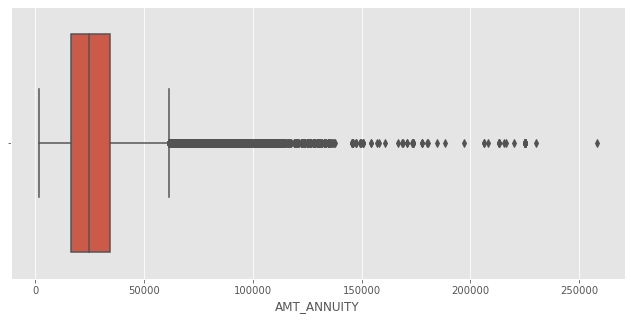

In [14]:
# Check for outliers using statistical summary for the column
print(df['AMT_ANNUITY'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(df['AMT_ANNUITY'])
plt.show()

Observations:

Our 99th percentile is far from our max value, shown by the outliers in our boxplot.


We would use median to imput but it is specified in case study not to.

AMT_GOODS_PRICE Imputation

Observations:

AMT_GOODS_PRICE - The price of the good for which the loan is given.

Missing value % is 0.09

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
1%       6.750000e+04
10%      1.800000e+05
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
99%      1.800000e+06
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64



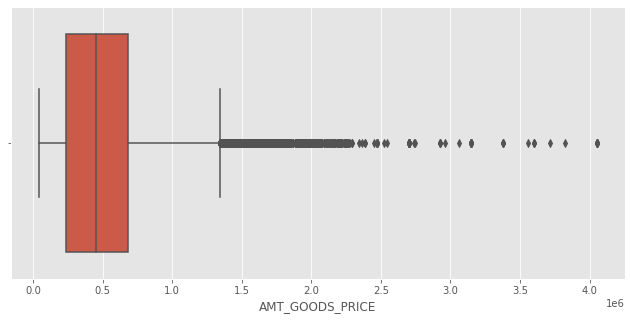

In [15]:
# Check for outliers with statistical analysis and boxplot
# Check for outliers using statistical summary for the column
print(df['AMT_GOODS_PRICE'].describe(percentiles=[0.01, 0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(df['AMT_GOODS_PRICE'])
plt.show()

Observations:

Our 99th percentile is far from our max value, shown by the outliers in our boxplot.

Outliers could be valid since they may represent the actual price of good.

We would use median to imput but it is specified in case study not to.

CNT_FAM_MEMBERS Imputation

Observations:

CNT_FAM_MEMBERS - How many family members does the client have , Numeric value

Missing value % is 0.0007

In [16]:
# Find the % of missing values in column
df['CNT_FAM_MEMBERS'].isnull().sum() / len(df['AMT_ANNUITY']) * 100

0.0006503832383231819

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
1%            1.000000
10%           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
99%           5.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64



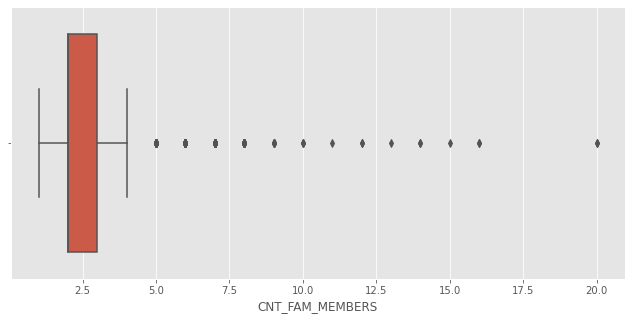

In [17]:
# Check for outliers using statistical summary for the column
print(df['CNT_FAM_MEMBERS'].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(df['CNT_FAM_MEMBERS'])
plt.show()

OCCUPATION_TYPE Imputation

Observations:

OCCUPATION_TYPE - Occupation of borrower, Categorical.

Missing value % is 31.35

In [18]:
# Find the % of missing values in column
df['OCCUPATION_TYPE'].isnull().sum() / len(df['AMT_ANNUITY']) * 100

31.345545362604916

In [19]:
# Check what values are repeated the most
print(df['OCCUPATION_TYPE'].value_counts())
print(df['OCCUPATION_TYPE'].mode()[0])

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64
Laborers


Observations:

Majority of people applying for loans are 'laborers'

Impute 'Unknown' value so we do not impute incorrect data

In [20]:
# impute Nan values with 'Unknown'
df['OCCUPATION_TYPE'].fillna(value='Unknown', inplace=True)

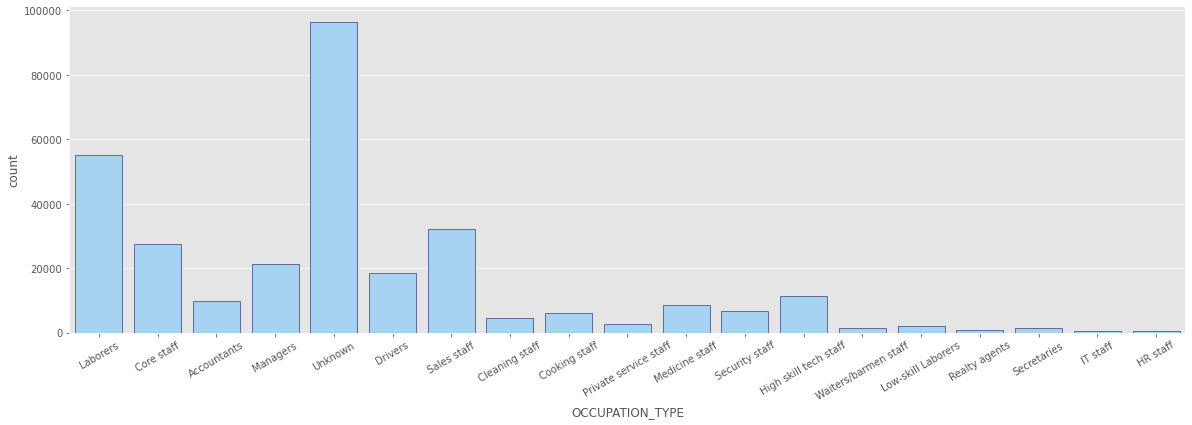

In [21]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
ax = sns.countplot(data=df, x='OCCUPATION_TYPE', color='#99d6ff',edgecolor="#00004d")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

EXT_SOURCE_2 Imputation

Observations:

EXT_SOURCE_2 - Normalized score from external data source, Numerical value.

Missing value % is 0.21

In [22]:
# Find the % of missing values in column
df['EXT_SOURCE_2'].isnull().sum() / len(df['AMT_ANNUITY']) * 100

0.21462646864665005

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.170000e-08
10%      2.156892e-01
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
99%      7.827928e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64



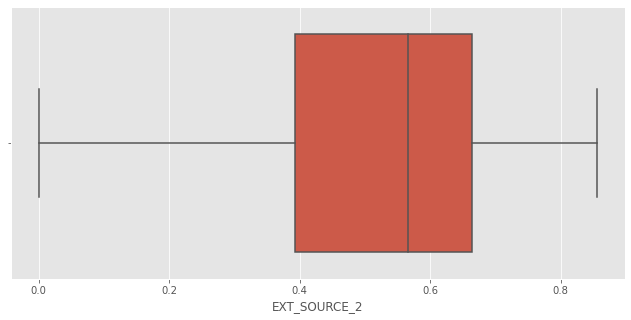

In [23]:
# Check for outliers using statistical summary for the column
print(df['EXT_SOURCE_2'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(df['EXT_SOURCE_2'])
plt.show()

Observations:

No outliers present since data has been normalized

Will not impute as specified in case study

AMT_CREDIT Imputation

Observations:

AMT_CREDIT - Credit amount of the loan, Numerical

No missing values

In [24]:
# Find the % of missing values in column
df['AMT_CREDIT'].isnull().sum() / len(df['AMT_ANNUITY']) * 100

0.0

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
10%      1.800000e+05
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
99%      1.854000e+06
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64



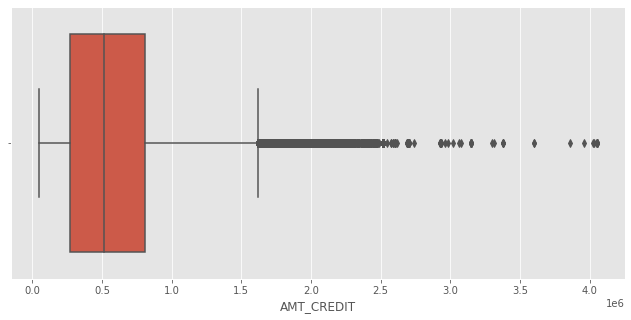

In [25]:
# Check for outliers using statistical summary for the column
print(df['AMT_CREDIT'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(df['AMT_CREDIT'])
plt.show()

Observations:

Outliers are present

People with higher credit score could have a higher loan amount approved

EXT_SOURCE Imputation

Observations:

EXT_SOURCE_3 - Normalized score from external data source, Numerical

Missing value % is 19.83

In [26]:
# Find the % of missing values in column
df['EXT_SOURCE_3'].isnull().sum() / len(df['AMT_ANNUITY']) * 100

19.825307062186393

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
10%           0.227613
25%           0.370650
50%           0.535276
75%           0.669057
99%           0.832785
max           0.896010
Name: EXT_SOURCE_3, dtype: float64



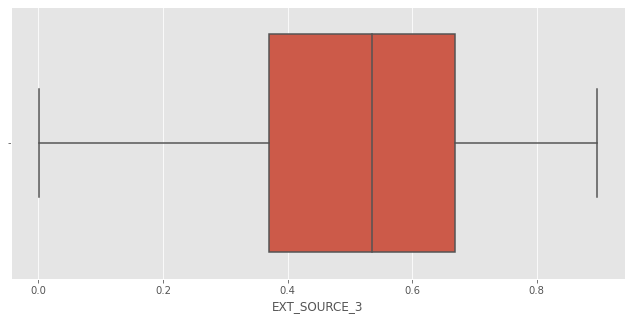

In [27]:
# Check for outliers using statistical summary for the column
print(df['EXT_SOURCE_3'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(df['EXT_SOURCE_3'])
plt.show()

Observations:

No outliers due to normalization.

We will drop column due to high number of missing values.

We will use EXT_SOURCE_2 instead.

In [28]:
df.drop(columns=['EXT_SOURCE_3'],axis=1,inplace=True)


Number of Inqueries to Credit Bureau Imputation

Observations:

These columns show the number of inqueries made to a credit bureau:
    
   -AMT_REQ_CREDIT_BUREAU_YEAR

   -AMT_REQ_CREDIT_BUREAU_QRT
    
   -AMT_REQ_CREDIT_BUREAU_MON

   -AMT_REQ_CREDIT_BUREAU_WEEK
    
   -AMT_REQ_CREDIT_BUREAU_DAY

   -AMT_REQ_CREDIT_BUREAU_HOUR  
    
Missing % of values in all these columns is 13.5

Null values suggest applicant has not gotten a loan

In [29]:
# Check summary stats for each column
df[['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR']].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402
std,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000


In [30]:
# Check most reccuring value for each column
df[['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR']].mode()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
0,0.0,0.0,0.0,0.0,0.0,0.0


Observations:

We do not impute so we do not introduce bias into the dataset

OBS_30_CNT_SOCIAL_CIRCLE Imputation

Observations:

OBS_30_CNT_SOCIAL_CIRCLE - Number of client's 30 days past due, Numerical

Missing value % is 0.33

In [31]:
# Find the % of missing values in column
df['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum() / len(df['AMT_ANNUITY']) * 100

0.3320206431639844

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
10%           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
99%          10.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64



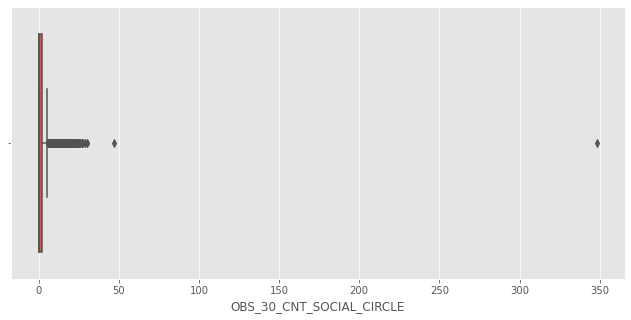

In [32]:
# Check for outliers using statistical summary for the column
print(df['OBS_30_CNT_SOCIAL_CIRCLE'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(df['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()

Observations:

There are 2 outliers

Mode: 0

Mean: 1.42

Median: 0

We can impute values with median since mean, median are close to eachother and we do not have many missing percent values

In [33]:
#impute using the median
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(value=df['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

### DEDUCING SOME INCORRECT VALUES:

In [34]:
#checking the NAME_TYPE_SUITE column
df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [35]:
df['NAME_TYPE_SUITE'].fillna('Not Availabe',inplace=True)
df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Not Availabe         1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Inspecting CODE_GENDER Column

Observations:

Gender can be male or female

In [36]:
# Check rows where gender is XNA
df[df['CODE_GENDER'] == 'XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,337500.0,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.020713,-20232,-10044,-10024.0,-3537,1,1,1,1,1,0,Unknown,2.0,3,3,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1,0.295998,0.0,0.0,0.0,0.0,-286.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,225000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13717,-2797,-2241.0,-4659,1,1,1,1,1,0,Low-skill Laborers,4.0,2,2,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,0.709205,0.0,0.0,0.0,0.0,-493.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.035792,-10647,-1228,-183.0,-1671,1,1,1,1,1,0,Core staff,3.0,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.659185,7.0,1.0,7.0,1.0,-851.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,900000.0,Unaccompanied,Commercial associate,Incomplete higher,Civil marriage,House / apartment,0.035792,-9649,-2293,-4099.0,-2326,1,1,1,1,1,0,Unknown,2.0,2,2,FRIDAY,15,0,0,0,0,0,0,Medicine,0.658620,10.0,4.0,10.0,4.0,-1681.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0


In [37]:
#Check for the distribution of gender
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Observations:

Female applicants are almost twice that of male applicants.

XNA may be clients who did not wish to specify gender.

In [38]:
# Impute value with female since is mode and it will not introduce bias in our data
df['CODE_GENDER'] = df['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)
df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [39]:
df['DAYS_BIRTH']=df['DAYS_BIRTH'].apply(lambda x: abs(x) if x<0 else x)
df['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [40]:
df['DAYS_EMPLOYED']=df['DAYS_EMPLOYED'].apply(lambda x: abs(x) if x<0 else x)
df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [41]:
df['DAYS_REGISTRATION']=df['DAYS_REGISTRATION'].apply(lambda x: abs(x) if x<0 else x)
df['DAYS_REGISTRATION'].describe()

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

In [42]:
df['DAYS_ID_PUBLISH']=df['DAYS_ID_PUBLISH'].apply(lambda x: abs(x) if x<0 else x)
df['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [43]:
df['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [44]:
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].apply(lambda x: 'Married' if x == 'Unknown' else x)
df['NAME_FAMILY_STATUS'].value_counts()

Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

## EXPLORATORY DATA ANALYSIS

### Checking imbalance for column "TARGET"

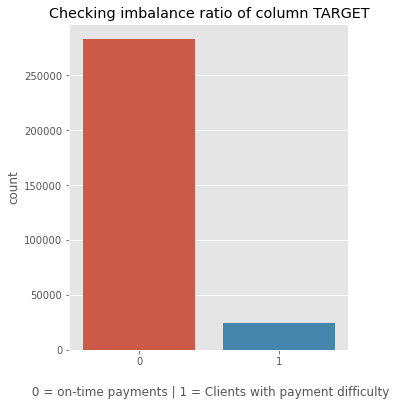

In [45]:
plt.figure(figsize=(5,6))
sns.countplot(data=df,x="TARGET")
plt.title("Checking imbalance ratio of column TARGET")
plt.xlabel("\n 0 = on-time payments | 1 = Clients with payment difficulty")
plt.show()

In [46]:
#EXACT RATIO
df[df.TARGET==0].shape[0]/df[df.TARGET==1].shape[0]

11.387150050352467

Observation:- 

One in every 11 customers has difficulty in payments.

In [47]:
#Creating a new dataframe with target value
df0=df[df["TARGET"]==0]
df1=df[df["TARGET"]==1]

In [48]:
df0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [49]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,6573.0,1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.0,0.0,0.0,0.0,-1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,45.0,4409,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,1.0,0.0,1.0,0.0,-1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,365243,5391.0,4199,1,0,0,1,0,0,Unknown,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
obj_cols=list(df.columns[df.dtypes=="object"])
obj_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

Defaulters
--------------------------------
Cash loans         23221
Revolving loans     1604
Name: NAME_CONTRACT_TYPE, dtype: int64
Total: 24825

On-time Payments
------------------------
Cash loans         255011
Revolving loans     27675
Name: NAME_CONTRACT_TYPE, dtype: int64
Total: 282686


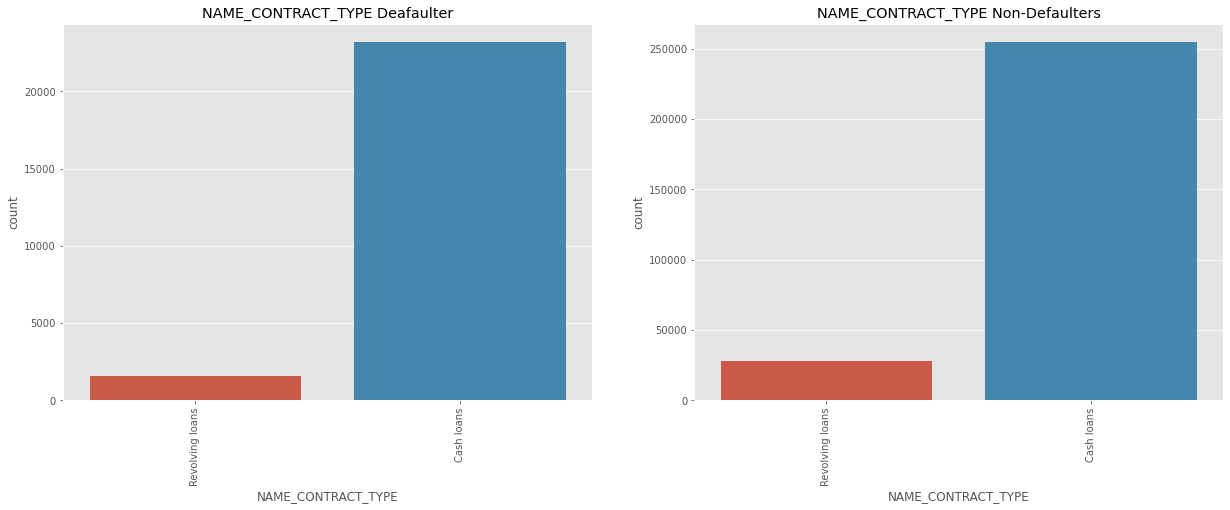

Defaulters
--------------------------------
F    14170
M    10655
Name: CODE_GENDER, dtype: int64
Total: 24825

On-time Payments
------------------------
F    188282
M     94404
Name: CODE_GENDER, dtype: int64
Total: 282686


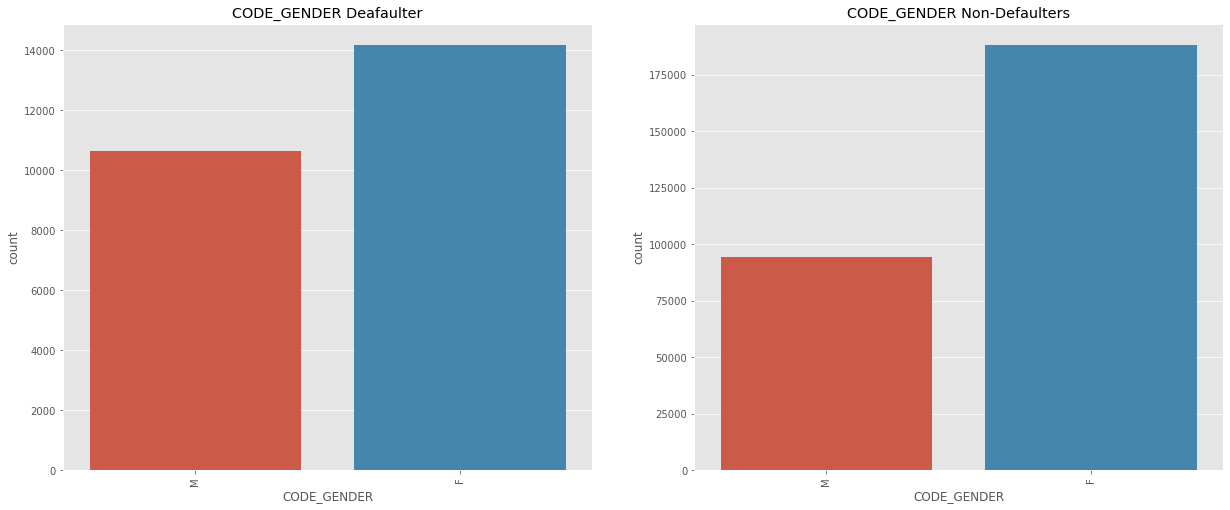

Defaulters
--------------------------------
N    17249
Y     7576
Name: FLAG_OWN_CAR, dtype: int64
Total: 24825

On-time Payments
------------------------
N    185675
Y     97011
Name: FLAG_OWN_CAR, dtype: int64
Total: 282686


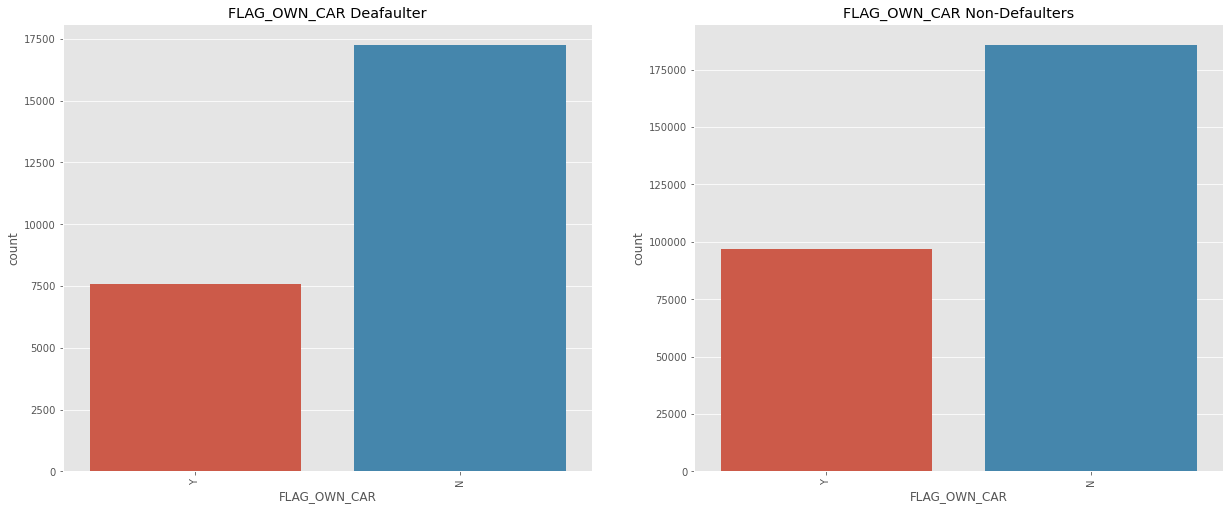

Defaulters
--------------------------------
Y    16983
N     7842
Name: FLAG_OWN_REALTY, dtype: int64
Total: 24825

On-time Payments
------------------------
Y    196329
N     86357
Name: FLAG_OWN_REALTY, dtype: int64
Total: 282686


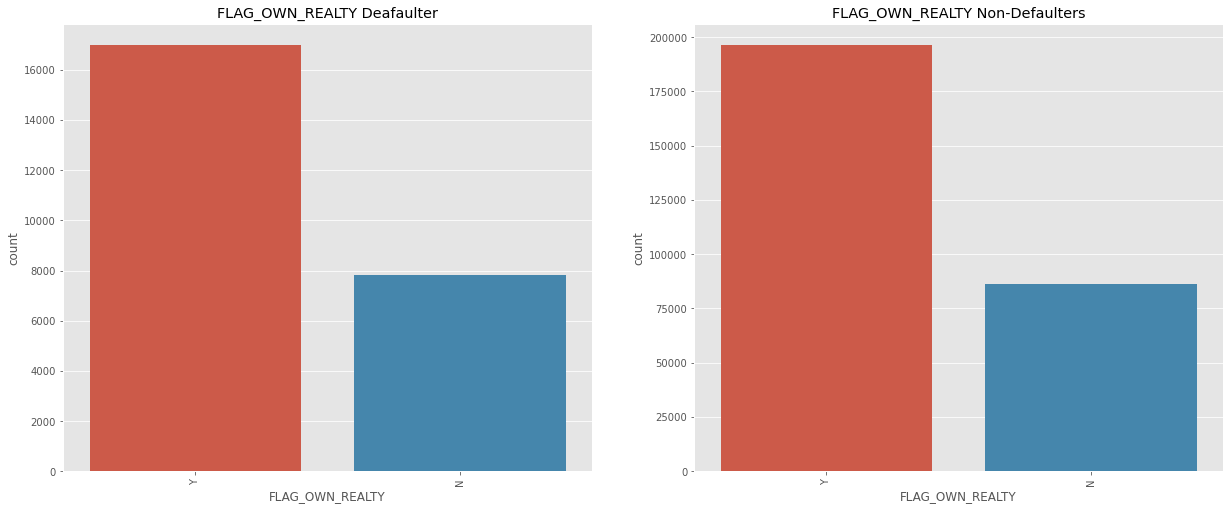

Defaulters
--------------------------------
Unaccompanied      20337
Family              3009
Spouse, partner      895
Children             241
Other_B              174
Other_A               76
Not Availabe          70
Group of people       23
Name: NAME_TYPE_SUITE, dtype: int64
Total: 24825

On-time Payments
------------------------
Unaccompanied      228189
Family              37140
Spouse, partner     10475
Children             3026
Other_B              1596
Not Availabe         1222
Other_A               790
Group of people       248
Name: NAME_TYPE_SUITE, dtype: int64
Total: 282686


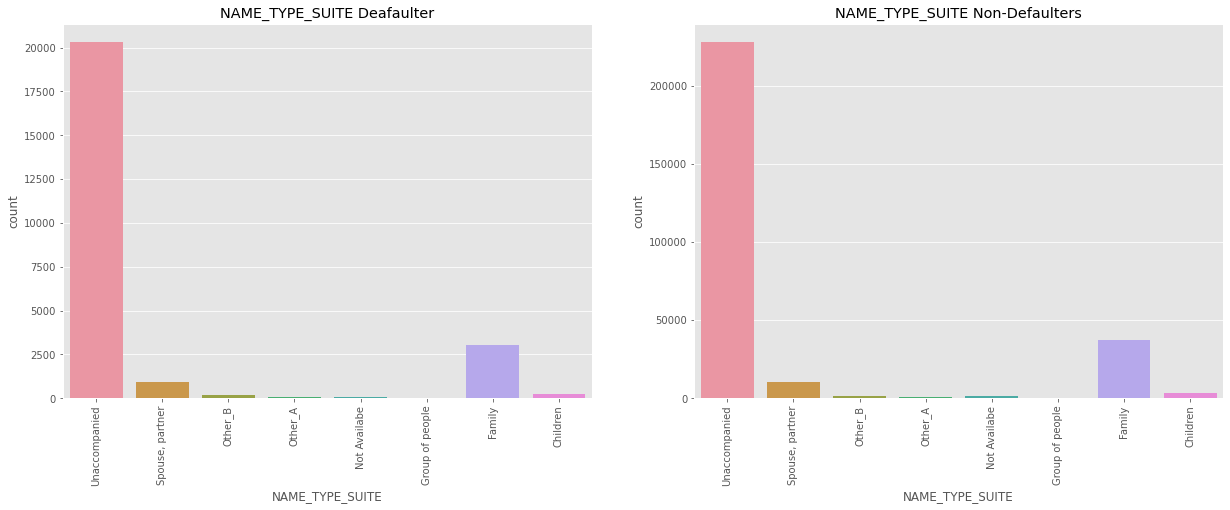

Defaulters
--------------------------------
Working                 15224
Commercial associate     5360
Pensioner                2982
State servant            1249
Unemployed                  8
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64
Total: 24825

On-time Payments
------------------------
Working                 143550
Commercial associate     66257
Pensioner                52380
State servant            20454
Student                     18
Unemployed                  14
Businessman                 10
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64
Total: 282686


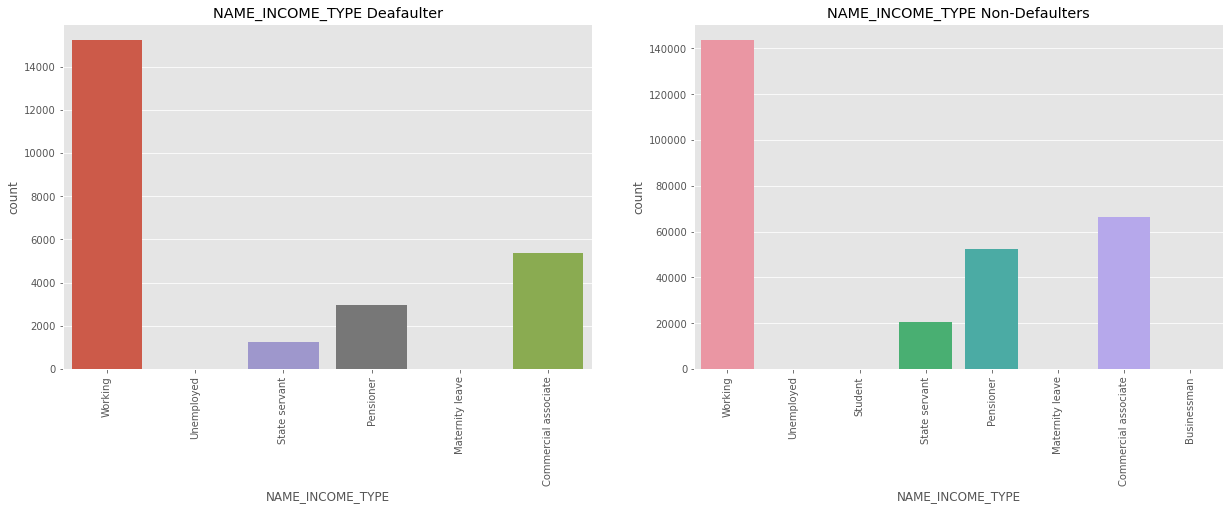

Defaulters
--------------------------------
Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: NAME_EDUCATION_TYPE, dtype: int64
Total: 24825

On-time Payments
------------------------
Secondary / secondary special    198867
Higher education                  70854
Incomplete higher                  9405
Lower secondary                    3399
Academic degree                     161
Name: NAME_EDUCATION_TYPE, dtype: int64
Total: 282686


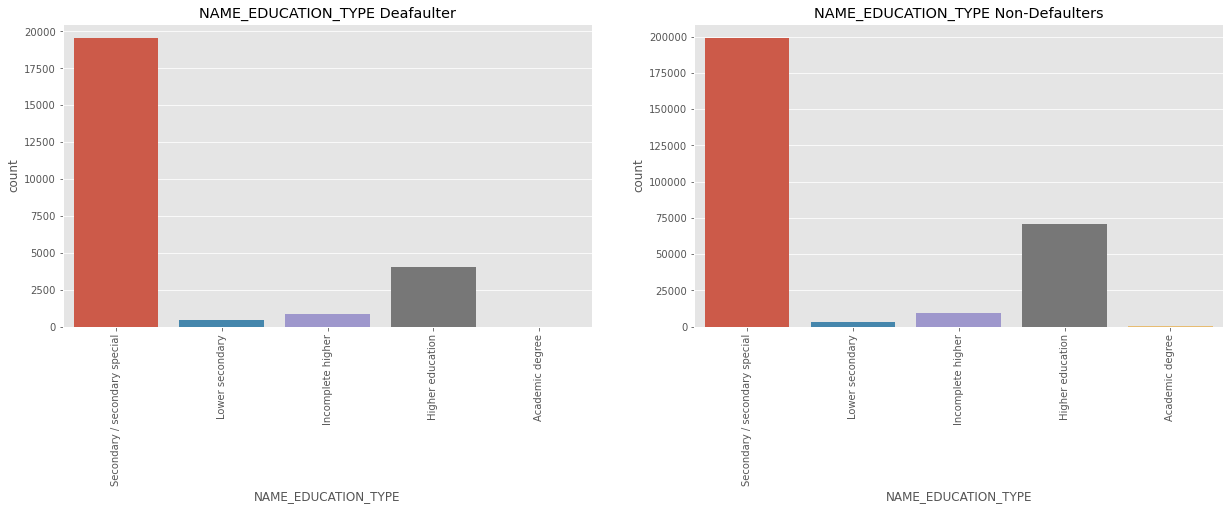

Defaulters
--------------------------------
Married                 14850
Single / not married     4457
Civil marriage           2961
Separated                1620
Widow                     937
Name: NAME_FAMILY_STATUS, dtype: int64
Total: 24825

On-time Payments
------------------------
Married                 181584
Single / not married     40987
Civil marriage           26814
Separated                18150
Widow                    15151
Name: NAME_FAMILY_STATUS, dtype: int64
Total: 282686


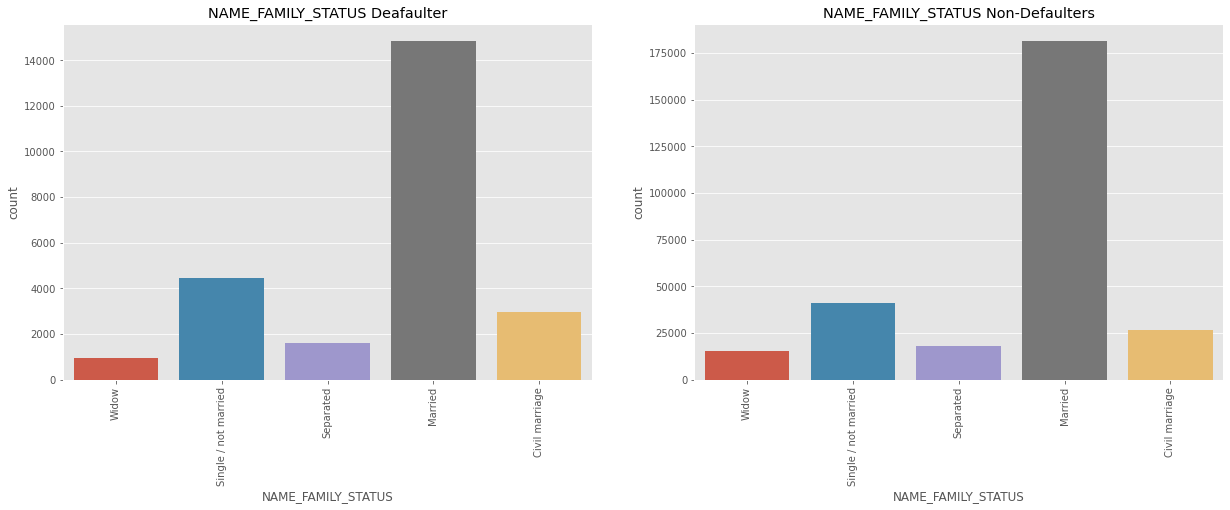

Defaulters
--------------------------------
House / apartment      21272
With parents            1736
Municipal apartment      955
Rented apartment         601
Office apartment         172
Co-op apartment           89
Name: NAME_HOUSING_TYPE, dtype: int64
Total: 24825

On-time Payments
------------------------
House / apartment      251596
With parents            13104
Municipal apartment     10228
Rented apartment         4280
Office apartment         2445
Co-op apartment          1033
Name: NAME_HOUSING_TYPE, dtype: int64
Total: 282686


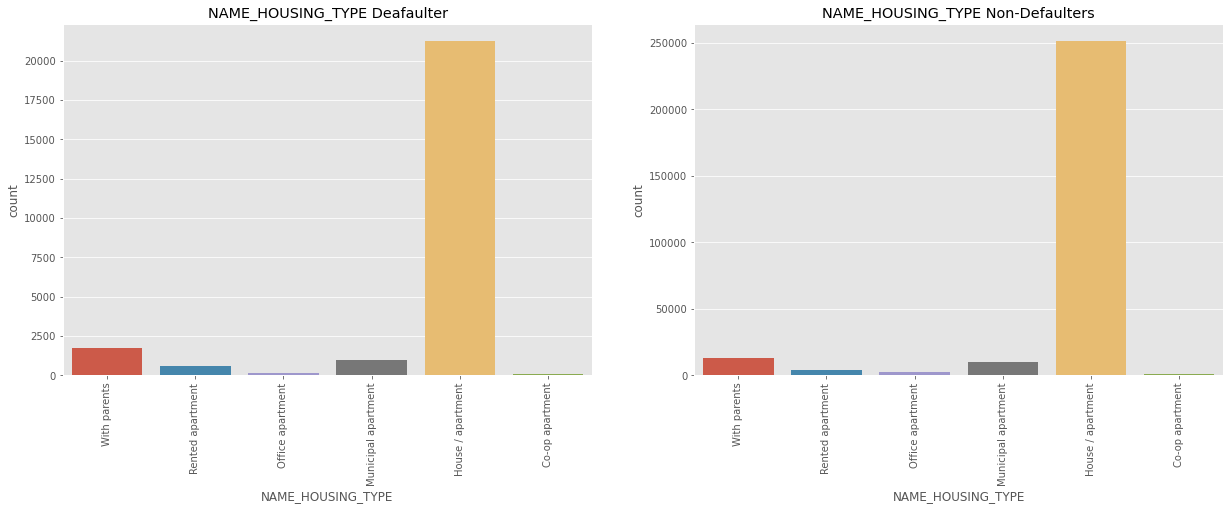

Defaulters
--------------------------------
Unknown                  6278
Laborers                 5838
Sales staff              3092
Drivers                  2107
Core staff               1738
Managers                 1328
Security staff            722
High skill tech staff     701
Cooking staff             621
Medicine staff            572
Accountants               474
Cleaning staff            447
Low-skill Laborers        359
Private service staff     175
Waiters/barmen staff      152
Secretaries                92
Realty agents              59
HR staff                   36
IT staff                   34
Name: OCCUPATION_TYPE, dtype: int64
Total: 24825

On-time Payments
------------------------
Unknown                  90113
Laborers                 49348
Sales staff              29010
Core staff               25832
Managers                 20043
Drivers                  16496
High skill tech staff    10679
Accountants               9339
Medicine staff            7965
Security staff 

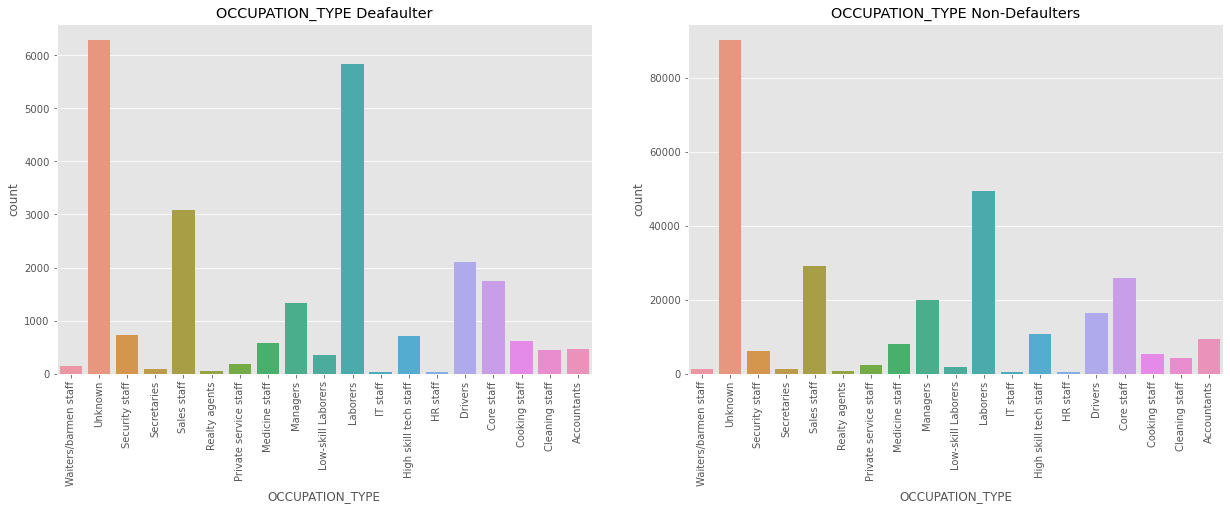

Defaulters
--------------------------------
TUESDAY      4501
WEDNESDAY    4238
FRIDAY       4101
THURSDAY     4098
MONDAY       3934
SATURDAY     2670
SUNDAY       1283
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64
Total: 24825

On-time Payments
------------------------
TUESDAY      49400
WEDNESDAY    47696
MONDAY       46780
THURSDAY     46493
FRIDAY       46237
SATURDAY     31182
SUNDAY       14898
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64
Total: 282686


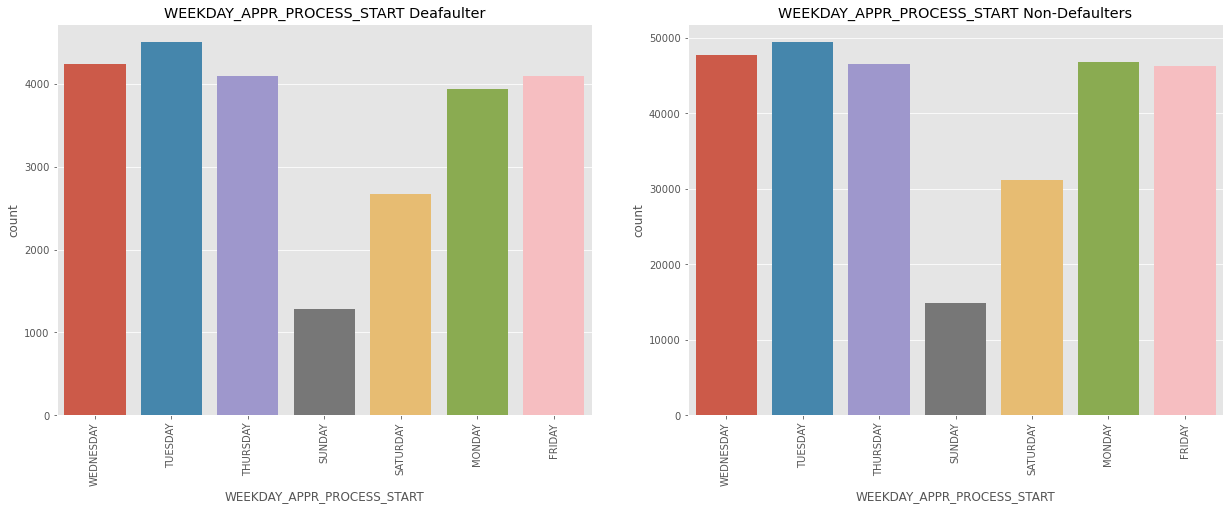

Defaulters
--------------------------------
Business Entity Type 3    6323
Self-employed             3908
XNA                       2990
Other                     1275
Business Entity Type 2     900
Construction               785
Trade: type 7              740
Medicine                   737
Government                 726
School                     526
Transport: type 4          501
Business Entity Type 1     487
Kindergarten               484
Trade: type 3              361
Industry: type 3           348
Security                   324
Agriculture                257
Housing                    235
Industry: type 11          234
Industry: type 9           225
Restaurant                 212
Transport: type 3          187
Postal                     182
Transport: type 2          172
Military                   135
Trade: type 2              133
Bank                       130
Police                     117
Industry: type 1           115
Industry: type 7           105
Services                  

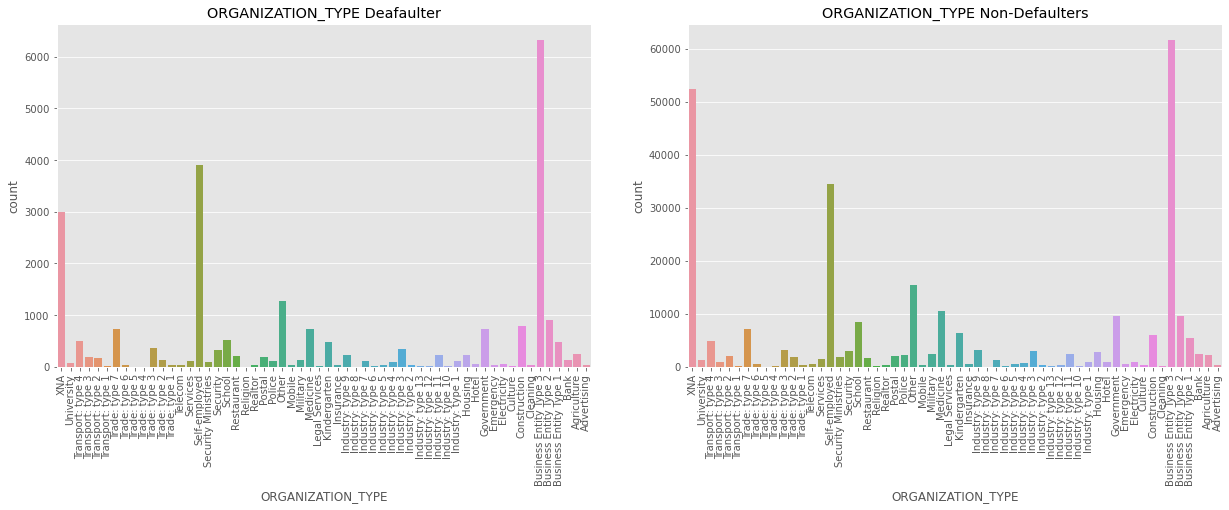

In [51]:
for i in obj_cols:
    plt.figure(figsize=(18,8))
    plt.subplot(1,2,1)
    plt.title(f"{i} Deafaulter")
    sns.countplot(data=df1,x=i, order=sorted(df1[i].unique(),reverse=True))
    plt.xticks(rotation=90)
    print("Defaulters")
    print("--------------------------------")
    print(df1[i].value_counts())
    print("Total:",df1[i].value_counts().sum())
    plt.subplot(1,2,2)
    plt.title(f"{i} Non-Defaulters")
    sns.countplot(data=df0, x=i, order= sorted(df0[i].unique(), reverse=True))
    plt.xticks(rotation=90)
    plt.tight_layout(pad=4)
    print()
    print("On-time Payments")
    print('------------------------')
    print(df0[i].value_counts())
    print("Total:", df0[i].value_counts().sum())
    plt.show()

Observation:

1. Cash loans are offered more than revolving loans.

   a. For defaulters 23221 customers were offered cash loans.
   
   b. For non-defaulters 255011 customers were offered cash loans.

2. Females have processed more loans in comparison to males.

   a. For defaulters 14170 are females.
   
   b. For non-defaulters 188282 are females.
   
3. Car-owners have processed less loans than non-car-owners.

   a. For defaulters 17249 are non-car owners.
   
   b. For non-defaulters 185675 are non-car owners.
   
4. House-owners have processed more loans as compared to non-house owners.

   a. For defaulters 16983 are house owners.
   
   b. For non-defaulters 196329 are house owners.
   
5. Most loans have been processed by the ones who were unaccompanied.

   a. For defaulters 20337 were unaccompanied.
   
   b. For non-defaulters 228189 were unaccompanied.
   
6. Working customers have processed more loans in comparison to others.

   a. For defaulters 15224 are working customers.
   
   b. For non-defaulters 143550 are working customers.
   
7. Customers with secondary/secondary special education type have processed more loans as compared to others.

   a. For defaulters 19524 are customers with secondary education.
   
   b. For non-defaulters 198867 are customers with secondary education.
   
8. Married customers have processed the highes loans.

   a. For defaulters 14850 are married.
   
   b. For non-defaulters 181584 are married.
   
9. House/apartment owners have processed more loans as compared to others.

   a. For defaulters 21272 are house/apartment owners.
   
   b. For non-defaulters 251596 are house/apartment owners.
   
10. Maximum loans are processed by customers with unknown working class. But labourers have processed the second highest number og loans.

11. Maximum loans were processed on tuesday.

    a. For defaulters 4501 have processed loans on Tuesdays.
    
    b. For non-defaulters 49400 have processed loans on Tuesdays.
    
12. Customers with business entity type 3 have processed the highest loans.

    a. For defaulters 6323 have business entity type 3.
    
    b. For non-defaulters 61669 have business entity type 3.

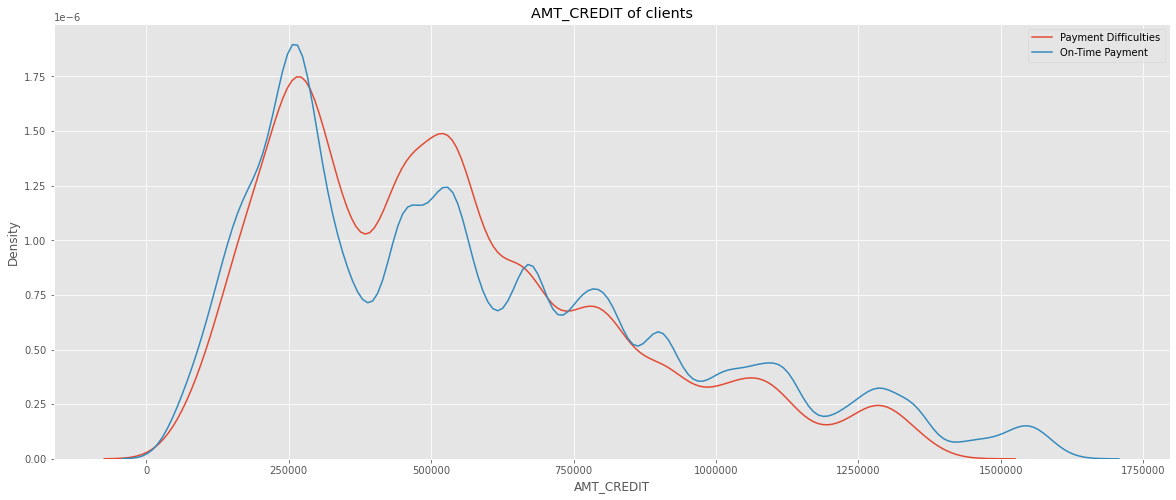

In [52]:
df1_q1 = df1['AMT_CREDIT'].quantile(0.25)
df1_q3 = df1['AMT_CREDIT'].quantile(0.75)
df1_IQR = df1_q3 - df1_q1
min_value_1 = (df1_q1 - 1.5 * df1_IQR)
max_value_1 = (df1_q3 + 1.5 * df1_IQR)
# On time payments
df0_q1 = df0['AMT_CREDIT'].quantile(0.25)
df0_q3 = df0['AMT_CREDIT'].quantile(0.75)
df0_IQR = df0_q3 - df0_q1
min_value_0 = (df0_q1 - 1.5 * df0_IQR)
max_value_0 = (df0_q3 + 1.5 * df0_IQR)
# Create Plots
plt.figure(figsize=(20, 8))
sns.distplot(df1[df1['AMT_CREDIT'] <= max_value_1]['AMT_CREDIT'], label= "Payment Difficulties", hist=False)
sns.distplot(df0[df0['AMT_CREDIT'] <= max_value_0]['AMT_CREDIT'], label= "On-Time Payment", hist=False)
plt.title('AMT_CREDIT of clients')
plt.ticklabel_format(style='plain', axis='x')
plt.legend()
plt.show()

Observation:

Most payment difficulties can be found in the range of 2,50,000-6,50,000.

In [53]:
#converting days to years
df1['YEARS_BIRTH']=df1['DAYS_BIRTH']/365
df0['YEARS_BIRTH']=df0['DAYS_BIRTH']/365

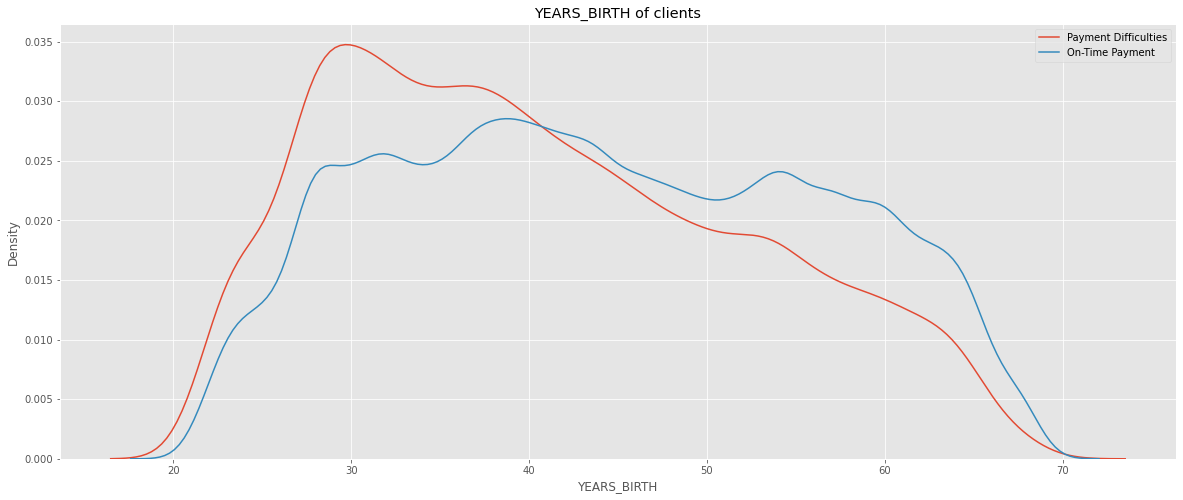

In [54]:
df1_q1 = df1['YEARS_BIRTH'].quantile(0.25)
df1_q3 = df1['YEARS_BIRTH'].quantile(0.75)
df1_IQR = df1_q3 - df1_q1
min_value_1 = (df1_q1 - 1.5 * df1_IQR)
max_value_1 = (df1_q3 + 1.5 * df1_IQR)
# On time payments
df0_q1 = df0['YEARS_BIRTH'].quantile(0.25)
df0_q3 = df0['YEARS_BIRTH'].quantile(0.75)
df0_IQR = df0_q3 - df0_q1
min_value_0 = (df0_q1 - 1.5 * df0_IQR)
max_value_0 = (df0_q3 + 1.5 * df0_IQR)
# Create Plots
plt.figure(figsize=(20, 8))
sns.distplot(df1[df1['YEARS_BIRTH'] <= max_value_1]['YEARS_BIRTH'], label= "Payment Difficulties", hist=False)
sns.distplot(df0[df0['YEARS_BIRTH'] <= max_value_0]['YEARS_BIRTH'], label= "On-Time Payment", hist=False)
plt.title('YEARS_BIRTH of clients')
plt.ticklabel_format(style='plain', axis='x')
plt.legend()
plt.show()

Observation:

Most payment difficulty lies in the age range of 25-40.

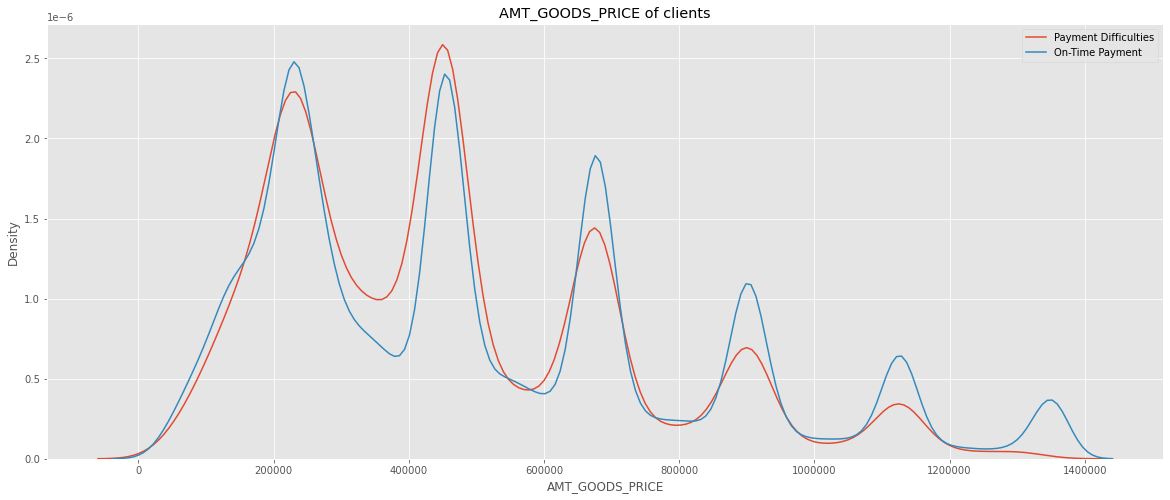

In [55]:
df1_q1 = df1['AMT_GOODS_PRICE'].quantile(0.25)
df1_q3 = df1['AMT_GOODS_PRICE'].quantile(0.75)
df1_IQR = df1_q3 - df1_q1
min_value_1 = (df1_q1 - 1.5 * df1_IQR)
max_value_1 = (df1_q3 + 1.5 * df1_IQR)
# On time payments
df0_q1 = df0['AMT_GOODS_PRICE'].quantile(0.25)
df0_q3 = df0['AMT_GOODS_PRICE'].quantile(0.75)
df0_IQR = df0_q3 - df0_q1
min_value_0 = (df0_q1 - 1.5 * df0_IQR)
max_value_0 = (df0_q3 + 1.5 * df0_IQR)
# Create Plots
plt.figure(figsize=(20, 8))
sns.distplot(df1[df1['AMT_GOODS_PRICE'] <= max_value_1]['AMT_GOODS_PRICE'], label= "Payment Difficulties", hist=False)
sns.distplot(df0[df0['AMT_GOODS_PRICE'] <= max_value_0]['AMT_GOODS_PRICE'], label= "On-Time Payment", hist=False)
plt.title('AMT_GOODS_PRICE of clients')
plt.ticklabel_format(style='plain', axis='x')
plt.legend()

Observation: 

Most payment difficulty lies between ~2,00,000 to ~5,00,000 amounts.

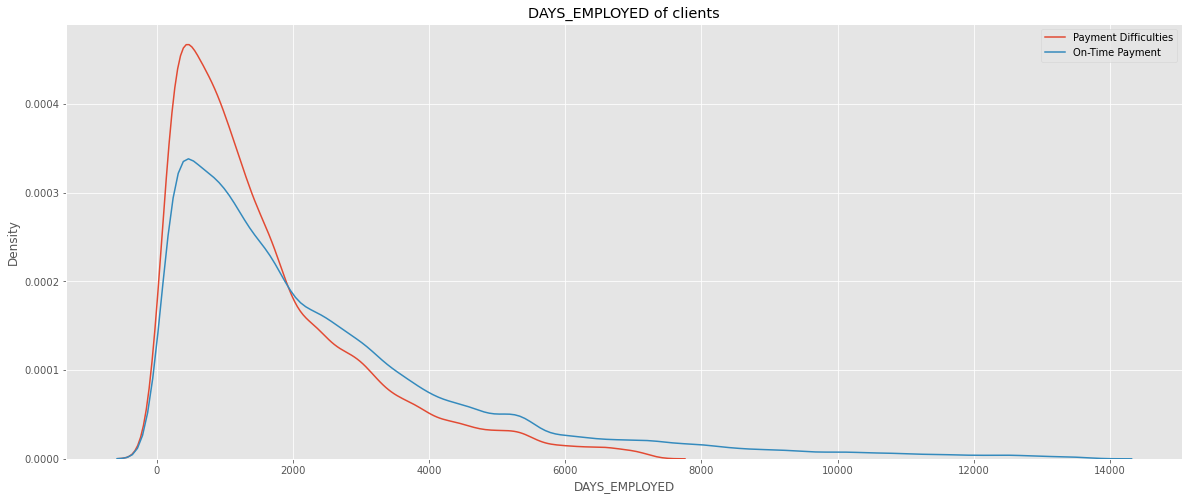

In [56]:
df1_q1 = df1['DAYS_EMPLOYED'].quantile(0.25)
df1_q3 = df1['DAYS_EMPLOYED'].quantile(0.75)
df1_IQR = df1_q3 - df1_q1
min_value_1 = (df1_q1 - 1.5 * df1_IQR)
max_value_1 = (df1_q3 + 1.5 * df1_IQR)
# On time payments
df0_q1 = df0['DAYS_EMPLOYED'].quantile(0.25)
df0_q3 = df0['DAYS_EMPLOYED'].quantile(0.75)
df0_IQR = df0_q3 - df0_q1
min_value_0 = (df0_q1 - 1.5 * df0_IQR)
max_value_0 = (df0_q3 + 1.5 * df0_IQR)
# Create Plots
plt.figure(figsize=(20, 8))
sns.distplot(df1[df1['DAYS_EMPLOYED'] <= max_value_1]['DAYS_EMPLOYED'], label= "Payment Difficulties", hist=False)
sns.distplot(df0[df0['DAYS_EMPLOYED'] <= max_value_0]['DAYS_EMPLOYED'], label= "On-Time Payment", hist=False)
plt.title('DAYS_EMPLOYED of clients')
plt.ticklabel_format(style='plain', axis='x')
plt.legend()

OBSERVATION:

This chart shows those who are employed longer do better with payments.

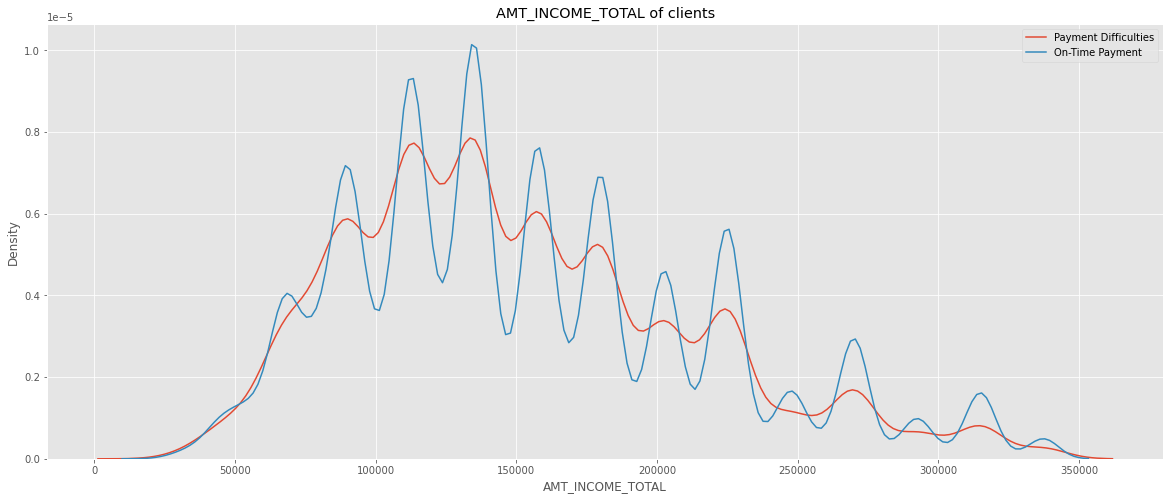

In [57]:
df1_q1 = df1['AMT_INCOME_TOTAL'].quantile(0.25)
df1_q3 = df1['AMT_INCOME_TOTAL'].quantile(0.75)
df1_IQR = df1_q3 - df1_q1
min_value_1 = (df1_q1 - 1.5 * df1_IQR)
max_value_1 = (df1_q3 + 1.5 * df1_IQR)
# On time payments
df0_q1 = df0['AMT_INCOME_TOTAL'].quantile(0.25)
df0_q3 = df0['AMT_INCOME_TOTAL'].quantile(0.75)
df0_IQR = df0_q3 - df0_q1
min_value_0 = (df0_q1 - 1.5 * df0_IQR)
max_value_0 = (df0_q3 + 1.5 * df0_IQR)
# Create Plots
plt.figure(figsize=(20, 8))
sns.distplot(df1[df1['AMT_INCOME_TOTAL'] <= max_value_1]['AMT_INCOME_TOTAL'], label= "Payment Difficulties", hist=False)
sns.distplot(df0[df0['AMT_INCOME_TOTAL'] <= max_value_0]['AMT_INCOME_TOTAL'], label= "On-Time Payment", hist=False)
plt.title('AMT_INCOME_TOTAL of clients')
plt.ticklabel_format(style='plain', axis='x')
plt.legend()

Observation:

Customers in the medium to high income range, i.e. ~80,000 to ~2,20,000 have the most loan applications.


#### Bivariate Analysis

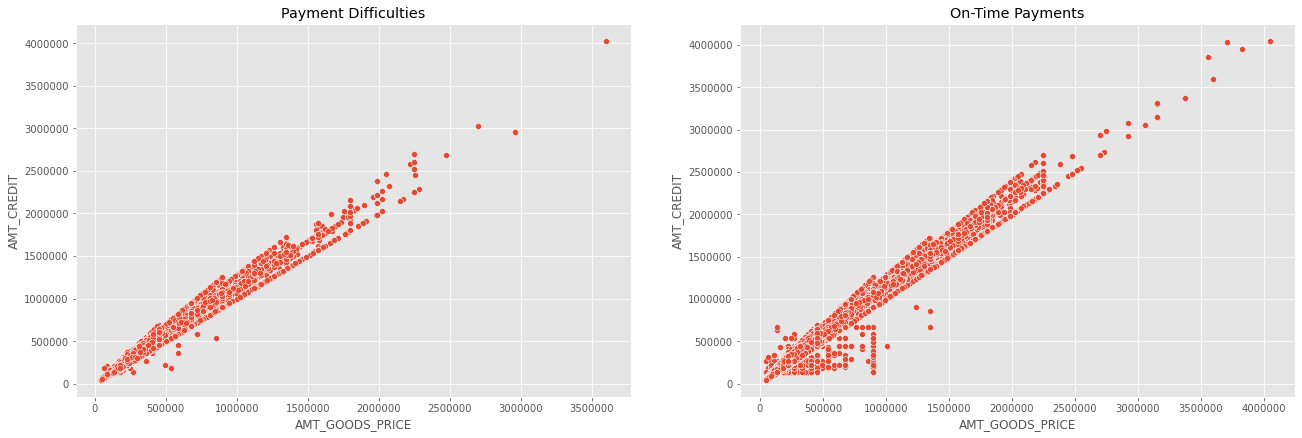

In [58]:
plt.figure(figsize=(19,7))
plt.subplot(1,2,1)
plt.title("Payment Difficulties")
sns.scatterplot(x=df1['AMT_GOODS_PRICE'], y=df1['AMT_CREDIT'], data=df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x=df0['AMT_GOODS_PRICE'], y=df0['AMT_CREDIT'], data=df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout(pad=4)
plt.show()

Observation:

AMT_GOODS_PRICE and AMT_CREDIT seem to have a positive correlation. When GOODS_PRICE increases so does AMT_CREDIT.

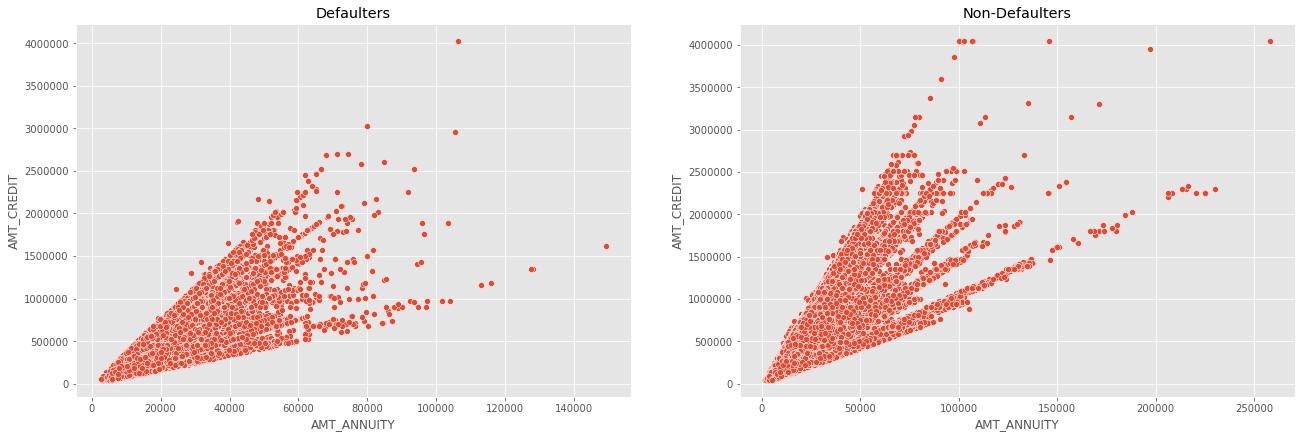

In [59]:
plt.figure(figsize=(19,7))
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.scatterplot(x=df1['AMT_ANNUITY'], y=df1['AMT_CREDIT'], data=df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.scatterplot(x=df0['AMT_ANNUITY'], y=df0['AMT_CREDIT'], data=df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout(pad=4)
plt.show()

Observation:

AMT_ANNUITY and AMT_CREDIT seem to have a positive correlation. When AMT_ANNUITY increases so does AMT_CREDIT.

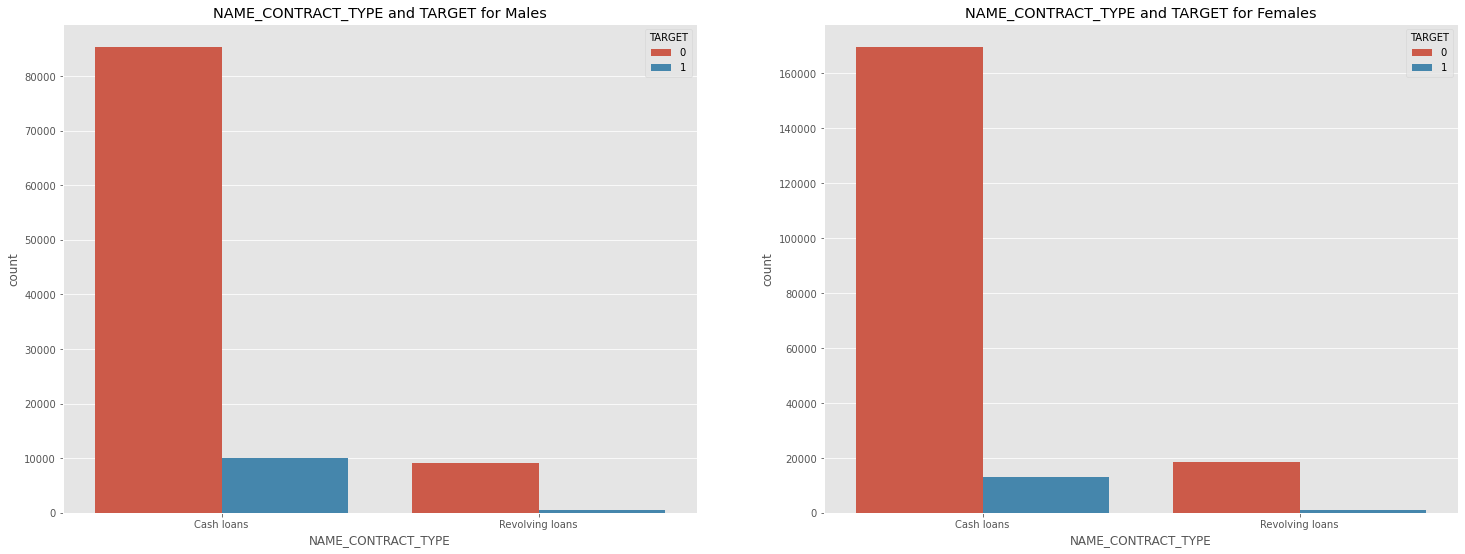

In [60]:
plt.figure(figsize = (25,9))
plt.subplot(1,2,1)
plt.title("NAME_CONTRACT_TYPE and TARGET for Males")
sns.countplot('NAME_CONTRACT_TYPE', hue='TARGET', data=df[(df['CODE_GENDER'] == 'M')])
plt.subplot(1,2,2)
plt.title("NAME_CONTRACT_TYPE and TARGET for Females")
sns.countplot('NAME_CONTRACT_TYPE', hue='TARGET', data=df[(df['CODE_GENDER'] == 'F')])
plt.show()

Observation:

Cash loans are much higher than revolving loans for both genders.

In [61]:
# selecting all numerical columns except flags for correlation analysis
for i in df.columns:
    if i.startswith("FLAG"):
        df.drop(columns=i, inplace=True)
corr_df1 = df1.select_dtypes(include=["int64","float64"]).corr()

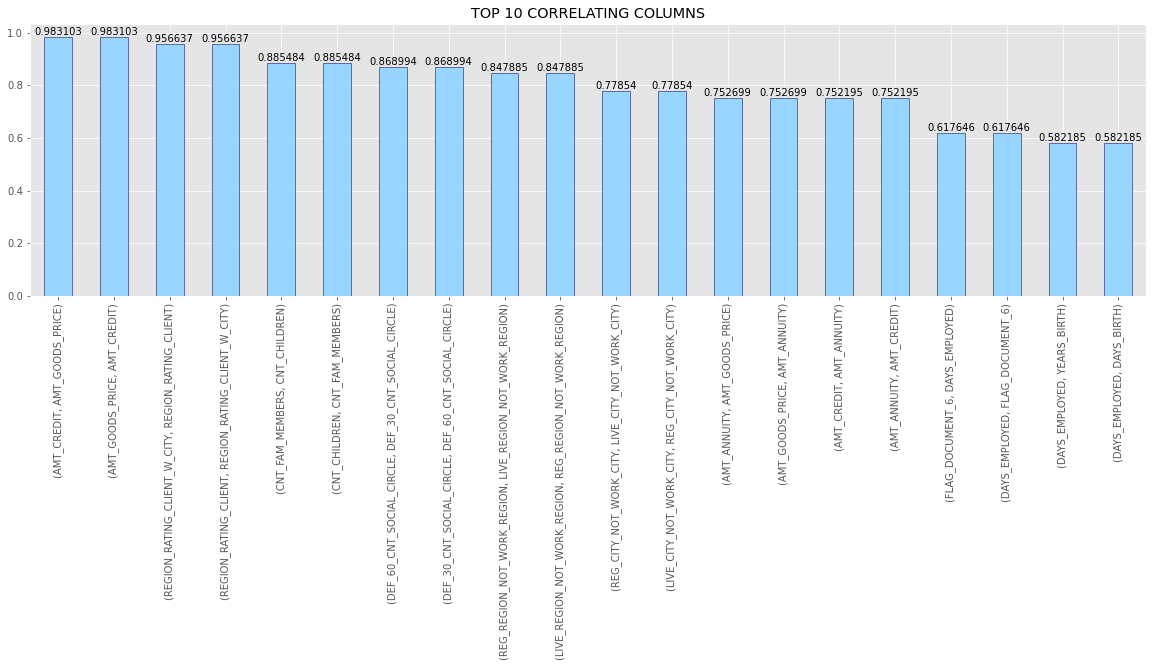

In [62]:
# selecting top 10 highly correlated columns with <=99% correlation because 100% correlation means same column.
plt.figure(figsize=(20,5))
plt.title("TOP 10 CORRELATING COLUMNS")
ax=corr_df1[corr_df1 <= 0.99].unstack().sort_values(ascending=False).head(20).plot.bar(color='#99d6ff',edgecolor="#00004d")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

One value is repeated twice due to structure of correlation df.

## CONCLUSION:

#### Category of clients that should be targetted :-
 
1. In the age group of 30-45.
2. Clients who have been employed for longer.
3. Male customers since they're taking less loans.
4. Customers from working class.
5. Clients with academic degree.

In [66]:
df.to_excel('BANK LOAN DEFAULTERS EDA.xlsx',index=False)